# 숙명여자대학교 기계시스템학부 딥러닝 2025: Lab2

## Topic: **Data Preparation & nn Module & CNN with MNIST**
## (강사: 심주용)


[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| **Datasets & DataLoaders** \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Datasets & DataLoaders
======================


Code for processing data samples can get messy and hard to maintain; we
ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. PyTorch provides two data
primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and
`DataLoader` wraps an iterable around the `Dataset` to enable easy
access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such
as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. They can be used to prototype
and benchmark your model. You can find them here: [Image
Datasets](https://pytorch.org/vision/stable/datasets.html), [Text
Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio
Datasets](https://pytorch.org/audio/stable/datasets.html)


## Loading a Dataset
=================

Here is an example of how to load the
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's
article images consisting of 60,000 training examples and 10,000 test
examples. Each example comprises a 28×28 grayscale image and an
associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:

:   -   `root` is the path where the train/test data is stored,
    -   `train` specifies training or test dataset,
    -   `download=True` downloads the data from the internet if it\'s
        not available at `root`.
    -   `transform` and `target_transform` specify the feature and label
        transformations


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
len(training_data), len(test_data)
len(training_data[0])
img, label = training_data[0]
img.shape, label
# plt.imshow(img[0])
label

9

## Iterating and Visualizing the Dataset
=====================================

We can index `Datasets` manually like a list: `training_data[index]`. We
use `matplotlib` to visualize some samples in our training data.


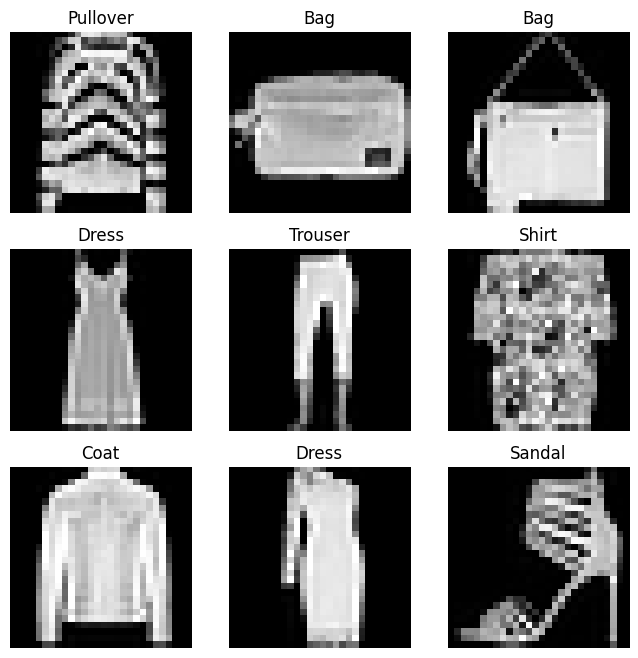

In [ ]:
  labels_map = {
      0: "T-Shirt",
      1: "Trouser",
      2: "Pullover",
      3: "Dress",
      4: "Coat",
      5: "Sandal",
      6: "Shirt",
      7: "Sneaker",
      8: "Bag",
      9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files
========================================

A custom Dataset class must implement three functions:
[\_\_init\_\_]{.title-ref}, [\_\_len\_\_]{.title-ref}, and
[\_\_getitem\_\_]{.title-ref}. Take a look at this implementation; the
FashionMNIST images are stored in a directory `img_dir`, and their
labels are stored separately in a CSV file `annotations_file`.

In the next sections, we\'ll break down what\'s happening in each of
these functions.


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing your data for training with DataLoaders
=================================================

The `Dataset` retrieves our dataset\'s features and labels one sample at
a time. While training a model, we typically want to pass samples in
\"minibatches\", reshuffle the data at every epoch to reduce model
overfitting, and use Python\'s `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

## Iterate through the DataLoader
==============================

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).


In [ ]:
for img, label in train_dataloader:
  print(img.shape); print(label)
  break

torch.Size([64, 1, 28, 28])
tensor([9, 0, 3, 0, 3, 2, 1, 4, 1, 7, 2, 8, 6, 4, 3, 6, 8, 5, 3, 7, 7, 2, 2, 7,
        0, 0, 8, 4, 4, 2, 6, 3, 5, 2, 7, 3, 1, 0, 3, 6, 7, 7, 3, 2, 8, 0, 5, 3,
        6, 6, 7, 3, 3, 1, 4, 9, 5, 9, 5, 6, 8, 5, 4, 1])


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


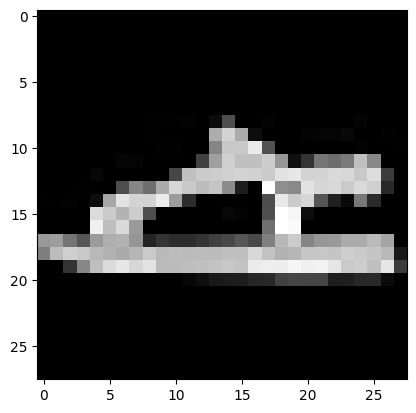

Label: 5


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Barebone Pytorch - Fashion MNIST
## Weight Initialization

Weight initialization is crucial in deep learning as it can significantly impact the model's convergence and performance. This tutorial covers the process of initializing weights and biases in a neural network using PyTorch, focusing on a three-layer fully connected network trained on the FashionMNIST dataset.


### Initializing Weights and Biases
In the NeuralNetwork class, we define the layers of the neural network with custom parameters using nn.Parameter. Each layer has its weights and biases, represented as matrices and vectors, respectively. We use PyTorch's torch.Tensor to define these parameters.

### Kaiming (He) Initialization
We apply Kaiming (or He) initialization to the weights using nn.init.kaiming_uniform_. This method is particularly suited for layers followed by ReLU activation functions, as it considers the nonlinearity of the activations. The initialization helps prevent vanishing or exploding gradients during training, promoting faster convergence and improved performance.

Kaiming initialization sets the tensor values uniformly in the range
[−a,a], where a=5 . This range is derived from the number of input and output units in the tensor, ensuring that the variance remains constant across layers.

### Zero Initialization for Biases
The biases are initialized to zero using nn.init.constant_. This is a common practice as it starts the neurons with an output of zero before adjusting during training, allowing the network to learn the bias for each neuron.

### Forward Pass
In the forward method, the input tensor is flattened and passed through the linear layers with ReLU activations, except for the last layer, which directly outputs the logits. This method defines how the data flows through the network, utilizing the initialized weights and biases.

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_size = 28*28
        self.hidden_size = 512
        self.output_size = 10

        self.linear1 = nn.Linear(self.input_size, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.linear3 = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, self.input_size)

        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        logits = self.linear3(x)

        return logits

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_size = 28*28
        self.hidden_size = 512
        self.output_size = 10

        # Initialize weights and biases for linear layers
        self.weight1 = nn.Parameter(torch.Tensor(self.hidden_size, self.input_size))
        self.bias1 = nn.Parameter(torch.Tensor(self.hidden_size))
        self.weight2 = nn.Parameter(torch.Tensor(self.hidden_size, self.hidden_size))
        self.bias2 = nn.Parameter(torch.Tensor(self.hidden_size))
        self.weight3 = nn.Parameter(torch.Tensor(self.output_size, self.hidden_size))
        self.bias3 = nn.Parameter(torch.Tensor(self.output_size))

        # Kaiming initialization for weights
        nn.init.kaiming_uniform_(self.weight1, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.weight2, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.weight3, nonlinearity='relu')

        # Initialize biases to zero
        nn.init.constant_(self.bias1, 0)
        nn.init.constant_(self.bias2, 0)
        nn.init.constant_(self.bias3, 0)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, self.input_size)

        # Apply the first linear layer and ReLU
        x = F.relu(F.linear(x, self.weight1, self.bias1))
        # Apply the second linear layer and ReLU
        x = F.relu(F.linear(x, self.weight2, self.bias2))
        # Apply the third linear layer
        logits = F.linear(x, self.weight3, self.bias3)

        return logits


### Compile the model

Set the **random seed** for PyTorch and NumPy respectively, which is essential for making your experiments **reproducible**.

---

### `torch.manual_seed(0)`

- This sets the seed for PyTorch's random number generator.
- PyTorch uses randomness for things like:
  - Initializing model weights
  - Random data augmentation
  - Random sampling in training (like shuffling)
- Setting the seed ensures that every time you run the script, **you get the same results** from these operations.

---

### 🔹 `np.random.seed(0)`

- This sets the seed for NumPy's random number generator.
- NumPy uses randomness in things like:
  - `np.random.rand()`, `np.random.randn()`
  - Shuffling arrays
  - Sampling from distributions
- Again, setting the seed here ensures **consistent outputs** every time the code runs.


In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np

torch.manual_seed(0)
np.random.seed(0)

# Initialize the model,
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork()


In [ ]:
model.state_dict().keys()

odict_keys(['weight1', 'bias1', 'weight2', 'bias2', 'weight3', 'bias3'])

In [ ]:
torch.manual_seed(0)
np.random.seed(0)
model = NeuralNetwork()
model.state_dict()['weight1']

tensor([[-0.0007,  0.0469, -0.0720,  ...,  0.0537,  0.0091,  0.0050],
        [-0.0484, -0.0367, -0.0256,  ..., -0.0496, -0.0146, -0.0734],
        [-0.0494,  0.0365, -0.0815,  ..., -0.0498,  0.0029,  0.0197],
        ...,
        [-0.0513,  0.0094, -0.0701,  ..., -0.0406,  0.0599, -0.0439],
        [ 0.0845, -0.0526, -0.0244,  ...,  0.0785,  0.0744,  0.0774],
        [-0.0696,  0.0031, -0.0253,  ...,  0.0250, -0.0567,  0.0465]])

In [ ]:
model.state_dict()['weight1']

tensor([[-0.0007,  0.0469, -0.0720,  ...,  0.0537,  0.0091,  0.0050],
        [-0.0484, -0.0367, -0.0256,  ..., -0.0496, -0.0146, -0.0734],
        [-0.0494,  0.0365, -0.0815,  ..., -0.0498,  0.0029,  0.0197],
        ...,
        [-0.0513,  0.0094, -0.0701,  ..., -0.0406,  0.0599, -0.0439],
        [ 0.0845, -0.0526, -0.0244,  ...,  0.0785,  0.0744,  0.0774],
        [-0.0696,  0.0031, -0.0253,  ...,  0.0250, -0.0567,  0.0465]])

In [ ]:
model.weight1.shape, model.weight1.T.shape

(torch.Size([512, 784]), torch.Size([784, 512]))

In [ ]:
model.bias1.shape

torch.Size([512])

In [ ]:
x = torch.randn(64,28*28)
x = torch.mm(x, model.weight1.T)+model.bias1

x.shape

torch.Size([64, 512])

### Training and Testing
The model is then compiled, trained, and evaluated. During training, the weights and biases are automatically adjusted through backpropagation. The weight initialization plays a critical role in ensuring that these adjustments lead to effective learning.

### Outlook
Proper weight initialization, like Kaiming initialization used here, is essential for training deep neural networks efficiently. It helps in maintaining a stable gradient flow across layers, leading to faster and more reliable convergence during training.

In [ ]:
# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the training loop
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Define the testing loop
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Epoch 1
-------------------------------
loss: 2.593934  [    0/60000]
loss: 0.533089  [ 6400/60000]
loss: 0.383679  [12800/60000]
loss: 0.499625  [19200/60000]
loss: 0.446706  [25600/60000]
loss: 0.422106  [32000/60000]
loss: 0.372907  [38400/60000]
loss: 0.521575  [44800/60000]
loss: 0.465882  [51200/60000]
loss: 0.478870  [57600/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.412737 

Epoch 2
-------------------------------
loss: 0.246846  [    0/60000]
loss: 0.311772  [ 6400/60000]
loss: 0.287407  [12800/60000]
loss: 0.350479  [19200/60000]
loss: 0.413477  [25600/60000]
loss: 0.365600  [32000/60000]
loss: 0.333014  [38400/60000]
loss: 0.484377  [44800/60000]
loss: 0.358451  [51200/60000]
loss: 0.444003  [57600/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.385971 

Epoch 3
-------------------------------
loss: 0.212790  [    0/60000]
loss: 0.317925  [ 6400/60000]
loss: 0.265910  [12800

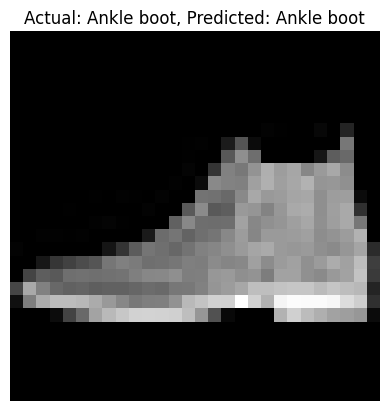

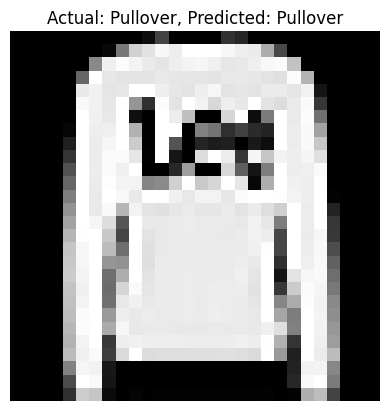

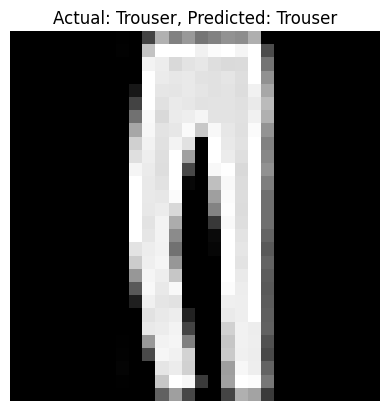

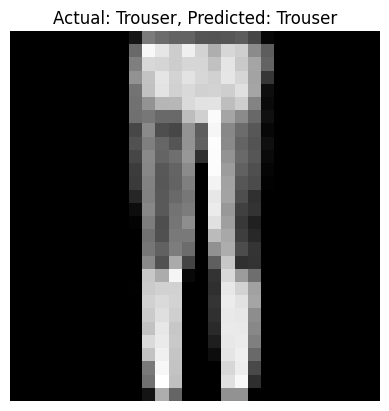

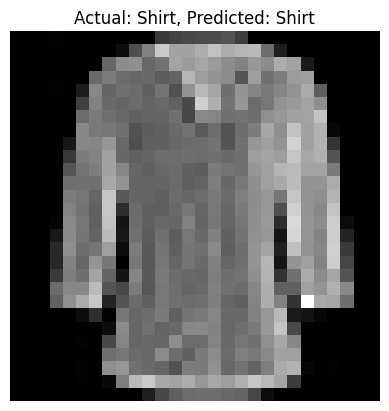

In [ ]:
# prompt: Visualize the inference and images after predicting using the trained model

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'test_data' and 'model' are defined as in your provided code

# Function to display the image and prediction
def visualize_prediction(image, actual_label, predicted_label):
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()


# Number of images to visualize
num_images_to_visualize = 5

# Iterate through a few images in the test dataset
for i in range(num_images_to_visualize):
    x, y = test_data[i][0], test_data[i][1]
    with torch.no_grad():
      x = x.to(device)
      pred = model(x)
      predicted = classes[pred[0].argmax(0)]
      actual = classes[y]
      visualize_prediction(x.cpu(), actual, predicted) #Move tensor to CPU for visualization



# CNN MNIST Example

Here's a complete PyTorch code snippet for classifying the MNIST dataset using a Convolutional Neural Network (CNN). This example covers the full process: loading the data, defining the model, training the model, and evaluating its performance.

## CNN with Dropout
Step-by-step tutorial on how to perform MNIST classification using PyTorch. MNIST is a dataset of handwritten digits, commonly used for training various image processing systems. This dataset contains 60,000 training images and 10,000 testing images, each being a 28x28 pixel grayscale image of a digit from 0 to 9.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np

# Set seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Step 1: Define the transformations and load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset_full = torchvision.datasets.MNIST(root='./data', train=True,
                                           download=True, transform=transform)
testset_full = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)

# Reduce the training set to 10%
num_train = len(trainset_full)
indices = list(range(num_train))
np.random.shuffle(indices)
subset_indices = indices[:int(0.001 * num_train)]
trainset = Subset(trainset_full, subset_indices)

num_test = len(testset_full)
indices = list(range(num_test))
np.random.shuffle(indices)
subset_indices = indices[:int(0.05 * num_test)]
testset = Subset(testset_full, subset_indices)

# DataLoader
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

print('num_train', num_train, 'num_test', num_test)

# Step 2: Define the CNN architecture with dropout
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=32, \
                               kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Instantiate networks
net_with_dropout = NetWithDropout()


num_train 60000 num_test 10000


In [ ]:
x = torch.randn(64,1,28,28)
net_with_dropout.conv1(x).shape

torch.Size([64, 32, 26, 26])

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1: Train Loss = 2.2977, Train Accuracy = 11.67%, Test Accuracy = 14.80%
Epoch 2: Train Loss = 2.2278, Train Accuracy = 20.00%, Test Accuracy = 10.00%
Epoch 3: Train Loss = 2.1325, Train Accuracy = 23.33%, Test Accuracy = 35.20%
Epoch 4: Train Loss = 1.9743, Train Accuracy = 35.00%, Test Accuracy = 38.00%
Epoch 5: Train Loss = 1.8648, Train Accuracy = 46.67%, Test Accuracy = 40.20%
Epoch 6: Train Loss = 1.7094, Train Accuracy = 51.67%, Test Accuracy = 41.00%
Epoch 7: Train Loss = 1.5477, Train Accuracy = 61.67%, Test Accuracy = 44.20%
Epoch 8: Train Loss = 1.3003, Train Accuracy = 73.33%, Test Accuracy = 48.20%
Epoch 9: Train Loss = 1.1143, Train Accuracy = 80.00%, Test Accuracy = 50.80%
Epoch 10: Train Loss = 0.9947, Train Accuracy = 76.67%, Test Accuracy = 52.20%
Epoch 11: Train Loss = 0.9350, Train Accuracy = 71.67%, Test Accuracy = 53.80%
Epoch 12: Train Loss = 0.7363, Train Accuracy = 85.00%, Test Accuracy = 54.40%
Epoch 13: Train Loss = 0.5628, Train Accuracy = 90.00%, Test 

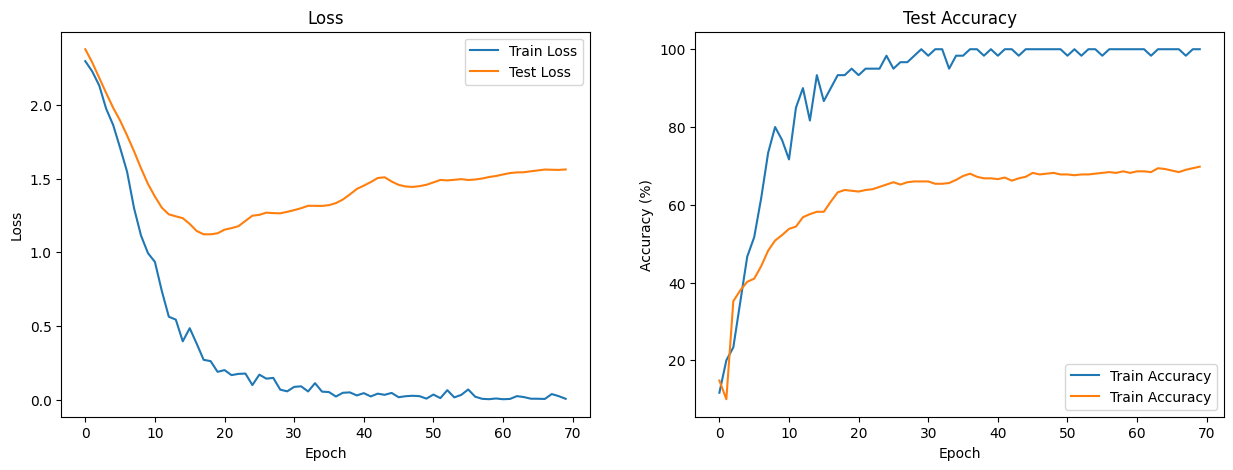

In [ ]:
# Step 3: Define a Loss function and Optimizer, and Train
def train_and_evaluate(model, optimizer, trainloader, testloader, epochs=70):
    criterion = nn.CrossEntropyLoss()
    training_losses = []
    training_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        training_losses.append(running_loss / len(trainloader))
        training_accuracies.append(100 * correct / total)

        # Evaluate on test data
        model.eval()
        correct = 0
        total = 0
        test_loss = 0
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_losses.append(test_loss / len(testloader))
        test_accuracies.append(100 * correct / total)
        print(f'Epoch {epoch + 1}: Train Loss = {running_loss / len(trainloader):.4f}, Train Accuracy = {training_accuracies[-1]:.2f}%, Test Accuracy = {100 * correct / total:.2f}%')

    return training_losses, test_losses, training_accuracies, test_accuracies

optimizer_with_do = optim.Adam(net_with_dropout.parameters(), lr=0.001)

loss_train, loss_test, acc_train_with_do, acc_test_with_do = \
train_and_evaluate(net_with_dropout, optimizer_with_do, trainloader, testloader)

# Plot the learning curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_train, label='Train Loss')
plt.plot(loss_test, label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_train_with_do, label='Train Accuracy')
plt.plot(acc_test_with_do, label='Train Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()
